# 3. KNN

In [22]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
# 2. Load the pre-split dataset

# Read the training and testing datasets from CSV files
X_train = pd.read_csv("../2_data/X_train.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

# Ensure the target variable has the correct shape (1D array)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [24]:
# 3. Standardize the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

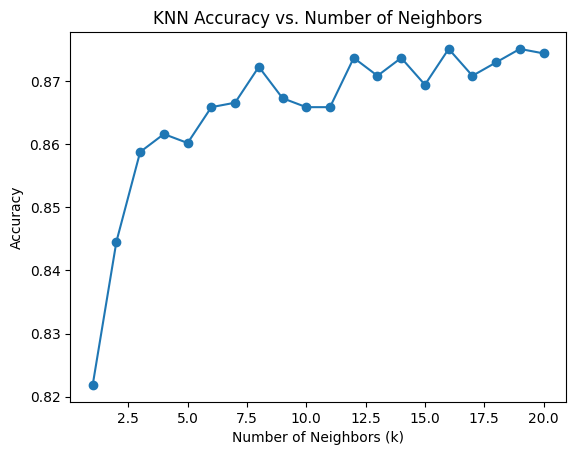

The best k value is: 16


In [25]:
import matplotlib.pyplot as plt

k_values = range(1, 21)  # Test k values from 1 to 20

def find_best_k(X_train_scaled, y_train, X_test_scaled, y_test, k_range):
    accuracies = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        accuracies.append(accuracy_score(y_test, y_pred))
    
    best_k = k_range[accuracies.index(max(accuracies))]
    
    # Plot the accuracy for each k value
    plt.plot(k_range, accuracies, marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title('KNN Accuracy vs. Number of Neighbors')
    plt.show()
    
    return best_k

best_k = find_best_k(X_train_scaled, y_train, X_test_scaled, y_test, k_values)
print(f"The best k value is: {best_k}")


In [26]:
# 4. Initialize and train the KNN model
# Set the number of neighbors (k)
k = best_k  # You can adjust this value to find the optimal k
print(k)
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier on the scaled training data
knn.fit(X_train_scaled, y_train)

16


KNeighborsClassifier(n_neighbors=16)

In [27]:
# Predict on the testing data
y_pred = knn.predict(X_test_scaled)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.88
Precision: 0.81
Recall: 0.70
F1: 0.75
ROC AUC: 0.82


In [30]:
evaluation_metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "roc_auc": roc_auc
}
evaluation_df = pd.DataFrame([evaluation_metrics])
evaluation_df.to_csv("../2_data/evaluation_metrics/KNN.csv", index=False)


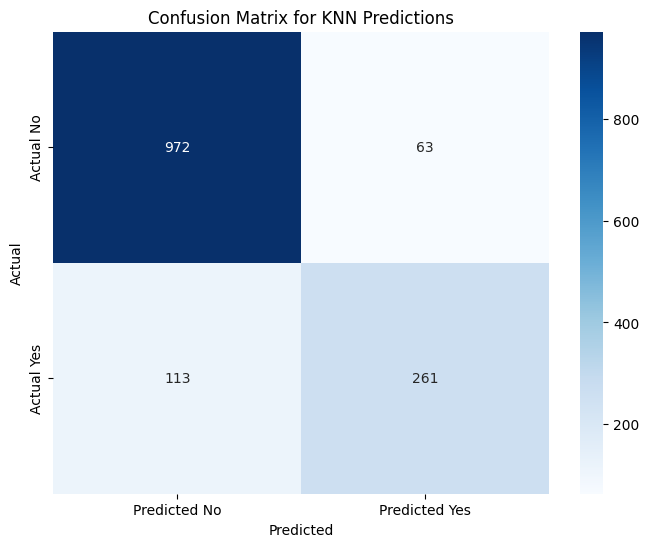

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Predictions')
plt.show()